# Predicting the Accuracy of Early-est Earthquake Magnitude Estimates with an LSTM Neural Network: A Preliminary Analysis

**Paper:** [https://arxiv.org/abs/2104.05712](https://arxiv.org/abs/2104.05712)

## Initial Dataset Analysis

In [10]:
import pandas as pd

CSV_FILE = 'data/608mwp.csv'

# Load dataset
df = pd.read_csv(CSV_FILE)

# Print data information
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9728 entries, 0 to 9727
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   evt             9728 non-null   int64  
 1   min             9728 non-null   int64  
 2   loc_err_h       9728 non-null   float64
 3   loc_err_z       9728 non-null   float64
 4   loc_err_resid   9728 non-null   float64
 5   loc_num_st      9728 non-null   int64  
 6   loc_min_dist    9728 non-null   float64
 7   loc_avg_dist    9728 non-null   float64
 8   loc_stdev_dist  9728 non-null   float64
 9   loc_azim_gap_1  9728 non-null   float64
 10  loc_azim_gap_2  9728 non-null   float64
 11  mag             9728 non-null   float64
 12  mag_err         9728 non-null   float64
 13  mag_num_st      9728 non-null   int64  
dtypes: float64(10), int64(4)
memory usage: 1.0 MB


,evt,min,loc_err_h,loc_err_z,loc_err_resid,loc_num_st,loc_min_dist,loc_avg_dist,loc_stdev_dist,loc_azim_gap_1,loc_azim_gap_2,mag,mag_err,mag_num_st
count,9.728000e+03,9728.000000,9728.000000,9728.000000,9728.000000,9728.000000,9728.000000,9728.000000,9728.000000,9728.000000,9728.000000,9728.000000,9728.000000,9728.000000
mean,2.293689e+07,8.500000,12.828533,882.600822,1.299647,58.237253,447.285387,4287.486229,2081.282363,96.141287,122.939329,5.615979,0.100475,16.333368
std,5.475242e+05,4.610009,5.550299,3949.038092,0.430753,51.217861,459.564773,2240.520628,1140.095845,50.628235,59.617693,0.437402,0.095462,27.345074
min,2.205719e+07,1.000000,1.468970,1.473430,0.041357,3.000000,12.007742,201.769799,73.582846,10.921500,16.312000,4.329760,0.000000,1.000000
25%,2.248946e+07,4.750000,7.878510,9.611517,1.002570,20.000000,171.606198,2456.575338,1200.460203,54.572900,73.251500,5.309960,0.000000,2.000000
50%,2.283666e+07,8.500000,13.829100,14.115400,1.231890,42.000000,304.940799,4078.807797,2002.507545,87.392800,115.850000,5.550705,0.100325,6.000000
75%,2.353063e+07,12.250000,15.358300,17.726600,1.528030,79.000000,515.049870,5993.341566,2776.099138,131.225500,164.306250,5.847395,0.151740,17.000000
max,2.384386e+07,16.000000,70.972300,63278.400000,3.211860,332.000000,4428.130631,12284.396289,7165.602299,264.032000,345.894000,7.811880,0.839305,281.000000


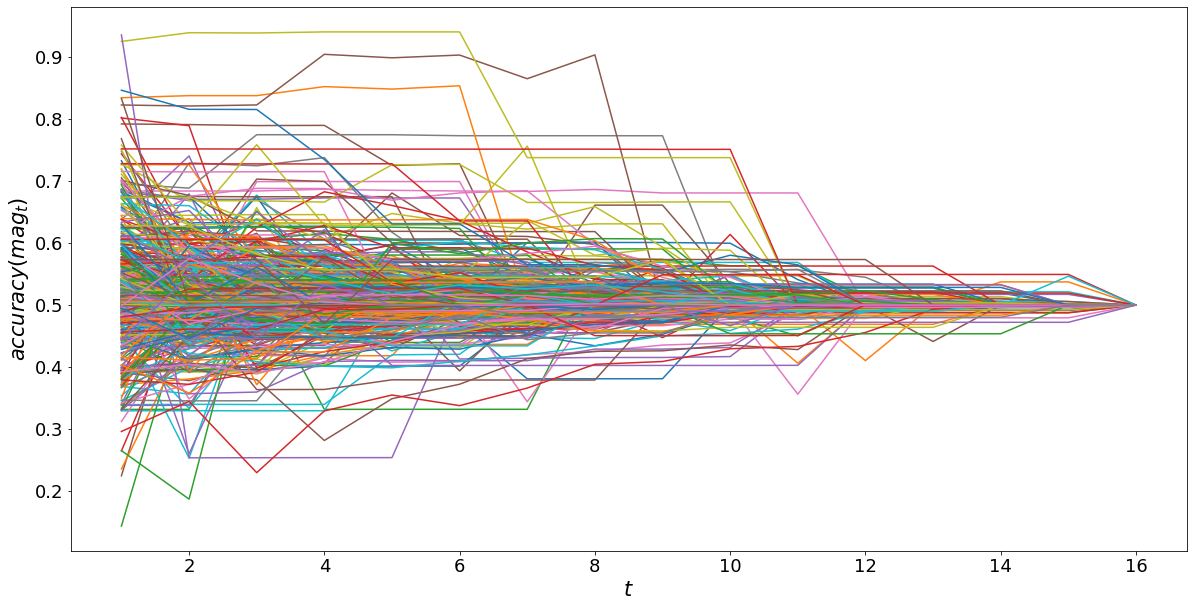

In [11]:
import pandas as pd

CSV_FILE = 'data/608mwp.csv'

df = pd.read_csv(CSV_FILE)

ax = None
# List of event IDs
el = df['evt'].drop_duplicates()
# Iterate over event IDs
for i, e in el.iteritems():
    # Select parameters of event e for each min (i.e. 16 rows times 14 columns)
    ep = df.loc[df['evt'] == e]
    # Final magnitude (i.e. mag at minute 16)
    final = ep.loc[ep.index[-1], 'mag']
    # Initialise list of mag accuracies
    accuracies = []
    # Initialise list of minutes (i.e. 1, 2, ..., 16)
    minutes = []
    # Iterate over event parameter rows (i.e. parameters for each minute)
    for j, r in ep.iterrows():
        # Current minute
        min = r['min']
        # Current magnitude
        mag = r['mag']
        # Current magnitude accuracy
        acc = (final-mag+1)/2
        # Add current minute to list
        minutes.append(min)
        # Add accuracy to list
        accuracies.append(acc)
    # Create a data frame with new data
    pdf = pd.DataFrame({
        'acc': accuracies
    }, index=minutes)
    # If plot was not created
    if ax is None:
        # Create plot with new data
        ax = pdf.plot(legend=False, figsize=(20,10), fontsize=18)
        # Set x and y axis labels
        ax.set_xlabel(r'$t$', fontsize=21)
        ax.set_ylabel(r'$accuracy(mag_t)$', fontsize=21)
    else:
        # Add new data to existing plot
        plot = pdf.plot(ax=ax, legend=False, figsize=(20,10))

# Show plot
fig = plot.get_figure()

## Data Scaling

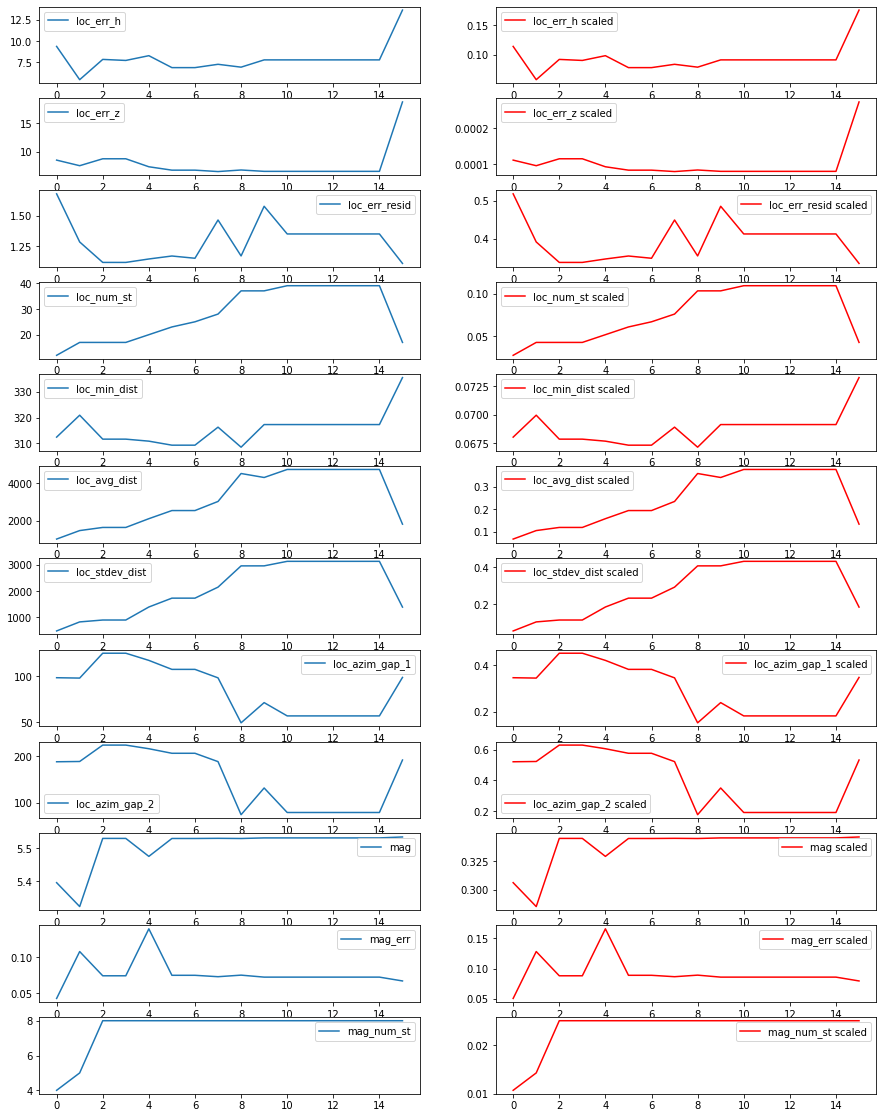

In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
import matplotlib.pyplot as plt

CSV_FILE = 'data/608mwp.csv'

df = pd.read_csv(CSV_FILE)

# Initialize scaler
mms = MinMaxScaler()
df_scaled = df.copy()

# Scale data
df_scaled[df_scaled.columns[2:]] = mms.fit_transform(df_scaled[df_scaled.columns[2:]])

P = ('loc_err_h',
     'loc_err_z',
     'loc_err_resid',
     'loc_num_st',
     'loc_min_dist',
     'loc_avg_dist',
     'loc_stdev_dist',
     'loc_azim_gap_1',
     'loc_azim_gap_2',
     'mag',
     'mag_err',
     'mag_num_st')

fig, ax = plt.subplots(len(P), 2, figsize=(15,20))

# Plot original (left) and scaled (right) parameter data of the 1st event in the dataset
for i, parameter in enumerate(P):
    ax[i,0].plot(df[parameter][:16].tolist())
    ax[i,0].legend([parameter])
    ax[i,1].plot(df_scaled[parameter][:16].tolist(), color='r')
    ax[i,1].legend([parameter + ' scaled'])
plt.show()

## Feature Extraction and Labeling

In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
import matplotlib.pyplot as plt

CSV_FILE = 'data/608mwp.csv'

df = pd.read_csv(CSV_FILE)

# Initialize scaler
mms = MinMaxScaler()
df_scaled = df.copy()
# Scale data
df_scaled[df_scaled.columns[2:]] = mms.fit_transform(df_scaled[df_scaled.columns[2:]])

print("==================================")
print("Compute Initial Samples")
print("==================================")

# Initialise input samples, i.e. param sequences for each event
X = []
# Initialise target samples, i.e. magnitude accuracy for each sequence
Y = []
# List of event IDs
el = df_scaled['evt'].drop_duplicates()
# Iterate over event IDs
for i, e in el.iteritems():
    # =====================
    # Compute Input Samples
    # =====================
    # Select parameters for each min (i.e., 16 rows times 14 columns)
    ep = df_scaled.loc[df_scaled['evt'] == e]
    # Remove first 2 columns 'evt' and 'min', i.e. event ID and minute
    params = ep.values[:,2:]
    # Shape of event params is (16, 12), i.e. 16 rows (one per minute) and 12 columns (one per param)
    assert params.shape == (16, 12)
    # Add event parameters w.r.t. current minute
    X.append(params)
    # ======================
    # Compute Target Samples
    # ======================
    # Initialise list of magnitude accuracies
    accuracies = []
    # Get final magnitude, i.e. magnitude at minute 16
    final = ep.loc[ep.index[-1], 'mag']
    # Iterate over event parameters (one sequence of parameters per minute)
    for j, r in ep.iterrows():
        # Magnitude at current minute
        mag = r['mag']
        # Append current minute magnitude accuracy
        accuracies.append((final-mag+1)/2)
    # Add mag accuracies w.r.t. all minutes
    Y.append(accuracies)
X = np.asarray(X, dtype=np.float64)
Y = np.asarray(Y, dtype=np.float64)    

# Print shape of initial samples
print("Shape of initial samples:")
print("X.shape =", X.shape)
assert X.shape == (608, 16, 12)
print("Y.shape =", Y.shape)
assert Y.shape == (608, 16)

print("==================================")
print("Compute Final Dataset with Samples")
print("==================================")

# Number of events
n = X.shape[0]
# Number of minutes per event
mins = X.shape[1]
# There are 16 minutes for each event
assert mins == 16
# Number of time steps
k = 2
# Initialise new input samples
X_new = []
# Initialise new target samples
Y_new = []
for i in range(n):
    for j in range(mins - k + 1):
        tmp = np.array(X[i,j:j+k,:])
        X_new.append(tmp)
        Y_new.append(Y[i,j+k-1])
X_new = np.array(X_new)
Y_new = np.array(Y_new)

# Print shape of final samples
print("Shape of final samples:")
print("X_new.shape =", X_new.shape)
print("Y_new.shape =", Y_new.shape)

Compute Initial Samples
Shape of initial samples:
X.shape = (608, 16, 12)
Y.shape = (608, 16)
Compute Final Dataset with Samples
Shape of final samples:
X_new.shape = (9120, 2, 12)
Y_new.shape = (9120,)


## Model Definition

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

# Length of sequences
k = 2
# Number of parameters per sequence
npar = 12

# Define Neural Network model
model = Sequential()
model.add(LSTM(20, activation='relu', return_sequences=True, input_shape=(k, npar)))
model.add(LSTM(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='mean_squared_logarithmic_error')

plot_model(model, to_file='/tmp/model.png', show_layer_names=False, show_shapes=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


## Training Process

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Number of consecutive sequences per input sample
k = 2
# Number of parameters per sequence
npar = 12

# Define NN model
model = Sequential()
model.add(LSTM(20, activation='relu', return_sequences=True, input_shape=(k, npar)))
model.add(LSTM(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='mean_squared_logarithmic_error')

# Split data into train and test dataset
indices = range(X_new.shape[0])
X_train, X_test, Y_train, Y_test, indices_train, indices_test = train_test_split(X_new, Y_new, indices, test_size=0.3)
print("X_train.shape", X_train.shape)
print("Y_train.shape", Y_train.shape)
print("X_test.shape", X_test.shape)
print("Y_test.shape", Y_test.shape)

history = model.fit(X_train, Y_train, validation_split=0.25, batch_size=16, epochs=100, verbose=1)

X_train.shape (6384, 2, 12)
Y_train.shape (6384,)
X_test.shape (2736, 2, 12)
Y_test.shape (2736,)
Epoch 1/100
300/300 [==============================] - 2s 7ms/step - loss: 5.3588e-05 - val_loss: 5.0762e-05
Epoch 2/100
300/300 [==============================] - 2s 6ms/step - loss: 5.1736e-05 - val_loss: 4.9933e-05
Epoch 3/100
300/300 [==============================] - 2s 6ms/step - loss: 5.0092e-05 - val_loss: 4.8695e-05
Epoch 4/100
300/300 [==============================] - 2s 6ms/step - loss: 4.9336e-05 - val_loss: 4.6866e-05
Epoch 5/100
300/300 [==============================] - 2s 5ms/step - loss: 4.8869e-05 - val_loss: 4.6797e-05
Epoch 6/100
300/300 [==============================] - 2s 7ms/step - loss: 4.8703e-05 - val_loss: 4.6446e-05
Epoch 7/100
300/300 [==============================] - 2s 6ms/step - loss: 4.8150e-05 - val_loss: 4.6374e-05
Epoch 8/100
300/300 [==============================] - 2s 7ms/step - loss: 4.8031e-05 - val_loss: 4.6017e-05
Epoch 9/100
300/300 [=========

## Evaluation

171/171 [==============================] - 1s 3ms/step - loss: 4.7222e-05
Test loss: 4.7221827117027715e-05


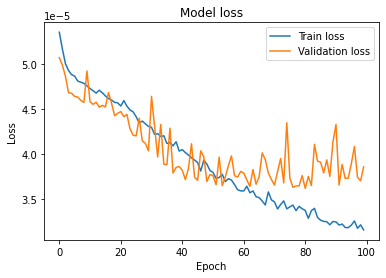

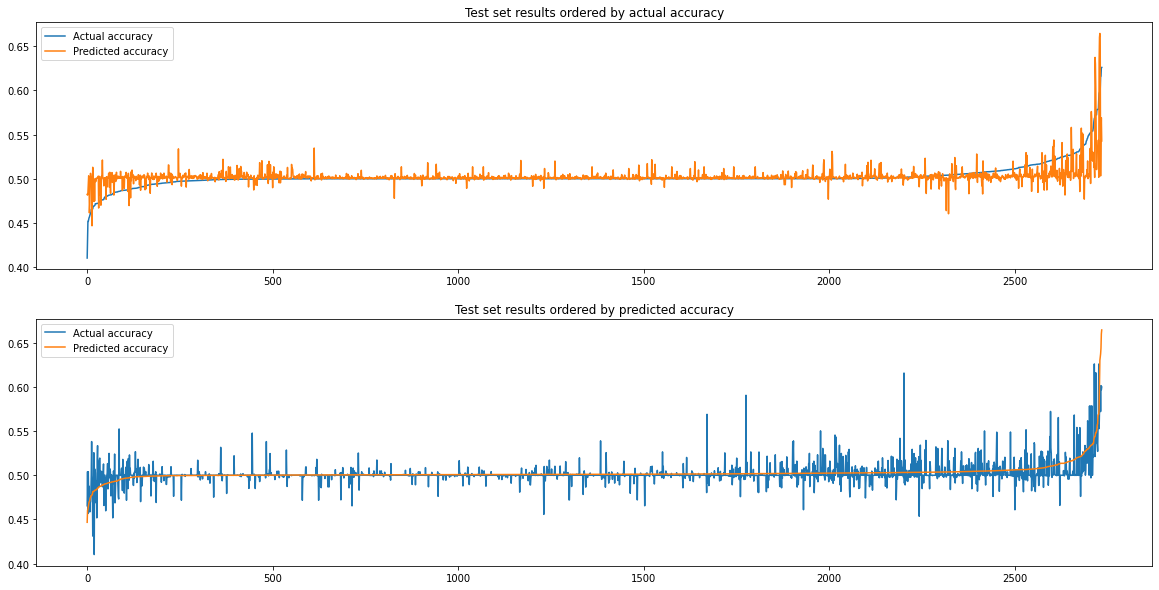

In [23]:
def store_csv_data(csvname, cname1, cdata1, cname2, cdata2):
    with open(csvname, 'w') as f:
        f.write(cname1 + "," + cname2 + "\n")
        for v1, v2 in zip(cdata1, cdata2):
            f.write(str(v1) + ',' + str(v2) + "\n")

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train loss', 'Validation loss'])
#plt.show()

plt.savefig('results/history.svg', dpi=300)
store_csv_data("results/history.csv", "train_loss", history.history['loss'], "validation_loss", history.history['val_loss'])

loss = model.evaluate(X_test, Y_test, batch_size=16)
print("Test loss:", loss)

# ========
# TEST SET
# ========

Y_pred = model.predict_on_batch(X_test)
Y_pred = np.array([float(y) for y in Y_pred])
idx_pred = np.argsort(Y_pred)

Y_test = np.array([float(y) for y in Y_test])
idx = np.argsort(Y_test)

fig, axs = plt.subplots(2, 1, figsize=(20,10))

axs[0].plot(Y_test[idx], label='Actual accuracy')
axs[0].plot(Y_pred[idx], label='Predicted accuracy')
axs[0].legend()
axs[0].set_title('Test set results ordered by actual accuracy')

store_csv_data("results/test-set-by-actual-accuracy.csv", "actual_accuracy", Y_test[idx], "predicted_accuracy", Y_pred[idx])

axs[1].plot(Y_test[idx_pred], label='Actual accuracy')
axs[1].plot(Y_pred[idx_pred], label='Predicted accuracy')
axs[1].legend()
axs[1].set_title('Test set results ordered by predicted accuracy')

store_csv_data("results/test-set-by-predicted-accuracy.csv", "actual_accuracy", Y_test[idx_pred], "predicted_accuracy", Y_pred[idx_pred])
plt.savefig('results/test-set-results.svg', dpi=300)

In [24]:
# Split test samples by minutes, i.e.,
# X_t[0] contains the input sequence (params at min 1, param at min 2)
# X_t[1] contains the input sequence (params at min 2, param at min 3)
# ...
# X_t[14] contains the input sequence (params at min 15, param at min 16)
# Y_t[0] contains the magnitude accuracy at min 2
# Y_t[1] contains the magnitude accuracy at min 3
# ...
# Y_t[14] contains the magnitude accuracy at min 16
X_t = [[] for t in range(15)]
Y_t = [[] for t in range(15)]
j = 0
for i in indices_test:
    X_t[j].append(X_new[i])
    Y_t[j].append(Y_new[i])
    j += 1
    if j%15 == 0:
        j = 0

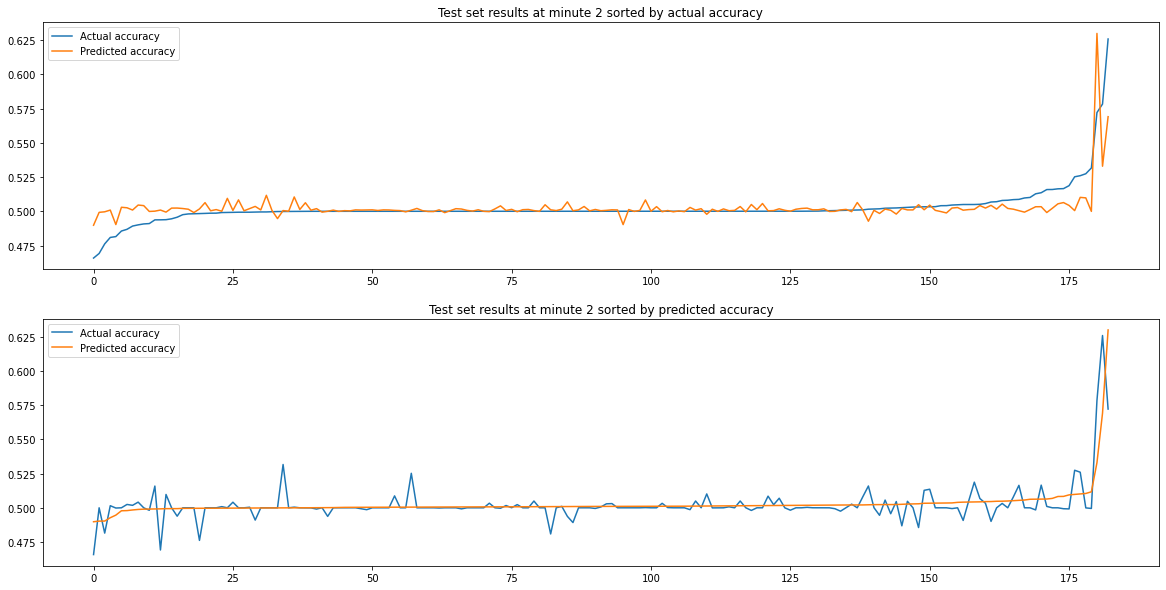

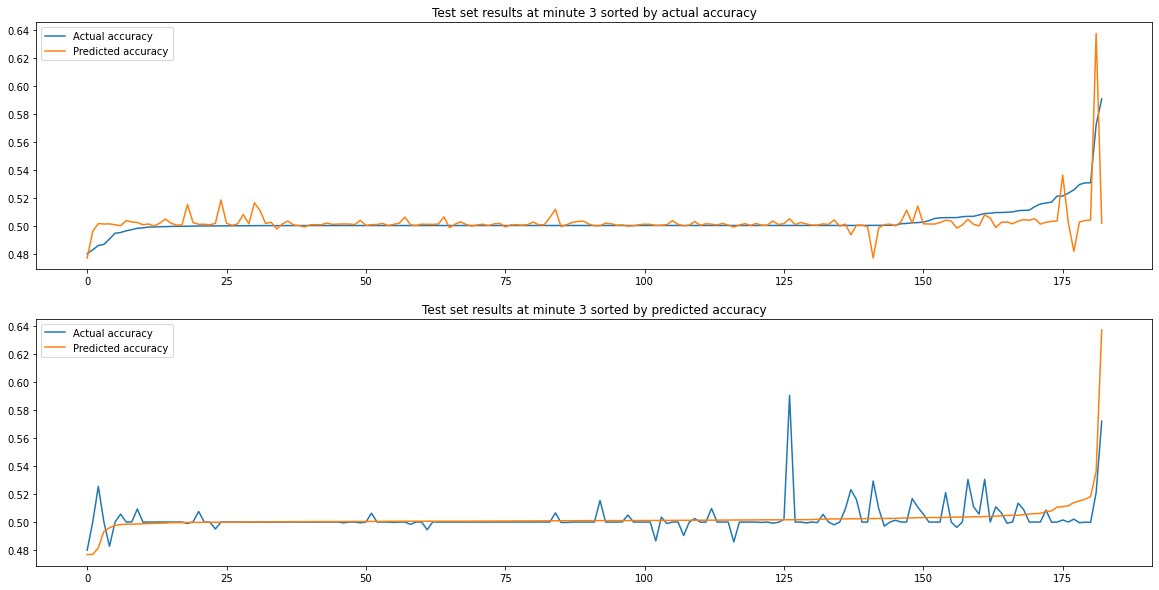

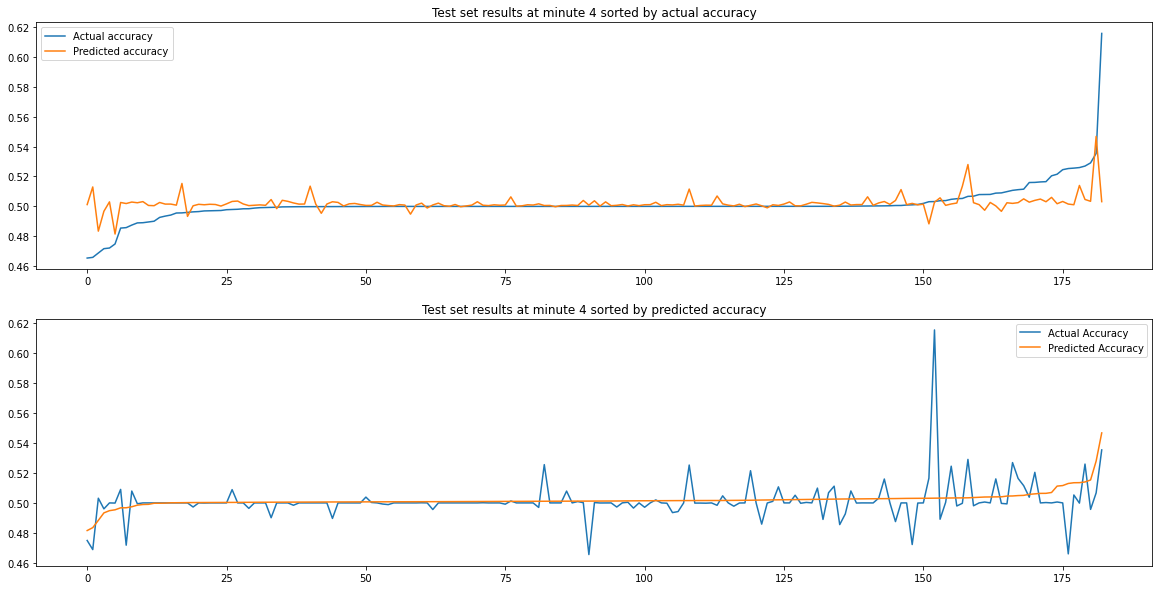

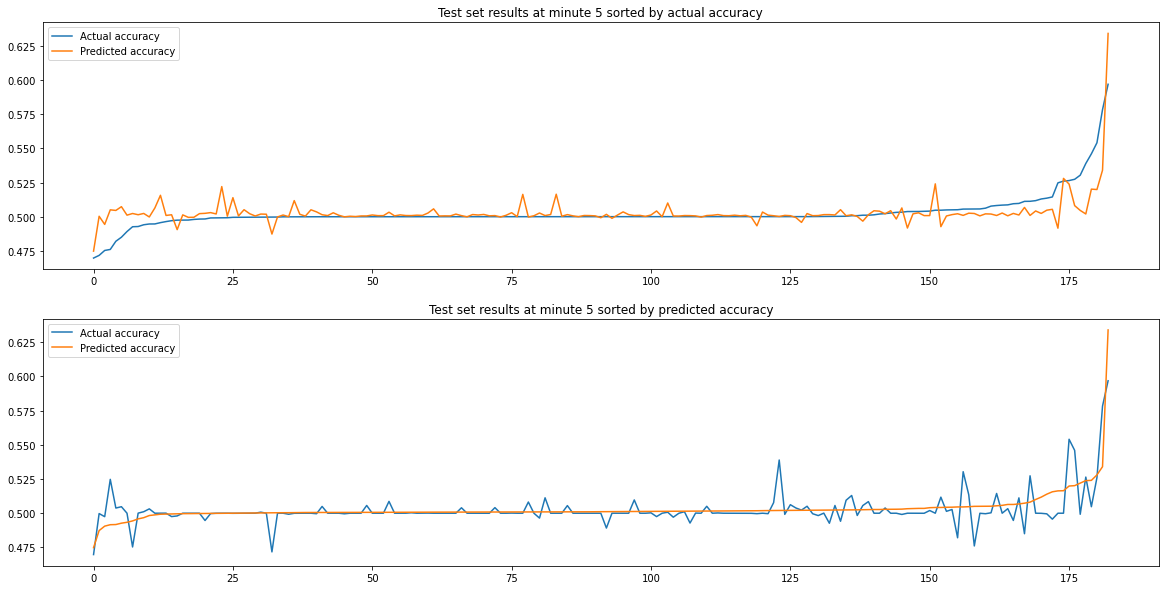

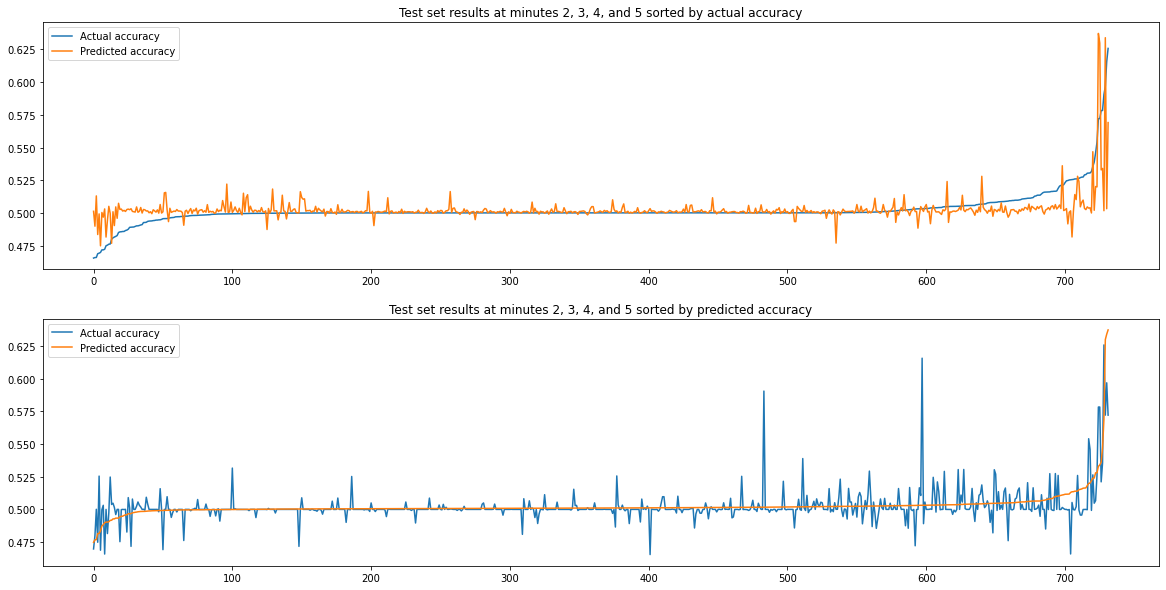

In [25]:
def store_csv_data(csvname, cname1, cdata1, cname2, cdata2):
    with open(csvname, 'w') as f:
        f.write(cname1 + "," + cname2 + "\n")
        for v1, v2 in zip(cdata1, cdata2):
            f.write(str(v1) + ',' + str(v2) + "\n")

# MINUTE 2
X_t[0] = np.array(X_t[0])
Y_t[0] = np.array(Y_t[0])

Y_pred = model.predict_on_batch(X_t[0])
Y_pred = np.array([float(y) for y in Y_pred])
idx_pred = np.argsort(Y_pred)

Y_t0 = np.array([float(y) for y in Y_t[0]])
idx = np.argsort(Y_t0)

fig, axs = plt.subplots(2, 1, figsize=(20,10))

axs[0].plot(Y_t0[idx], label='Actual accuracy')
axs[0].plot(Y_pred[idx], label='Predicted accuracy')
axs[0].legend()
axs[0].set_title('Test set results at minute 2 sorted by actual accuracy')

store_csv_data("results/minute-2-by-actual-accuracy.csv", "actual_accuracy", Y_t0[idx], "predicted_accuracy", Y_pred[idx])

axs[1].plot(Y_t0[idx_pred], label='Actual accuracy')
axs[1].plot(Y_pred[idx_pred], label='Predicted accuracy')
axs[1].legend()
axs[1].set_title('Test set results at minute 2 sorted by predicted accuracy')

store_csv_data("results/minute-2-by-predicted-accuracy.csv", "actual_accuracy", Y_t0[idx_pred], "predicted_accuracy", Y_pred[idx_pred])
plt.savefig('results/minute-2-results.svg', dpi=300)

##############################

# MINUTE 3
X_t[1] = np.array(X_t[1])
Y_t[1] = np.array(Y_t[1])

Y_pred = model.predict_on_batch(X_t[1])
Y_pred = np.array([float(y) for y in Y_pred])
idx_pred = np.argsort(Y_pred)

Y_t1 = np.array([float(y) for y in Y_t[1]])
idx = np.argsort(Y_t1)

fig, axs = plt.subplots(2, 1, figsize=(20,10))

axs[0].plot(Y_t1[idx], label='Actual accuracy')
axs[0].plot(Y_pred[idx], label='Predicted accuracy')
axs[0].legend()
axs[0].set_title('Test set results at minute 3 sorted by actual accuracy')

store_csv_data("results/minute-3-by-actual-accuracy.csv", "actual_accuracy", Y_t1[idx], "predicted_accuracy", Y_pred[idx])

axs[1].plot(Y_t1[idx_pred], label='Actual accuracy')
axs[1].plot(Y_pred[idx_pred], label='Predicted accuracy')
axs[1].legend()
axs[1].set_title('Test set results at minute 3 sorted by predicted accuracy')

store_csv_data("results/minute-3-by-predicted-accuracy.csv", "actual_accuracy", Y_t1[idx_pred], "predicted_accuracy", Y_pred[idx_pred])
plt.savefig('results/minute-3-results.svg', dpi=300)

##############################

# MINUTE 4
X_t[2] = np.array(X_t[2])
Y_t[2] = np.array(Y_t[2])

Y_pred = model.predict_on_batch(X_t[2])
Y_pred = np.array([float(y) for y in Y_pred])
idx_pred = np.argsort(Y_pred)

Y_t2 = np.array([float(y) for y in Y_t[2]])
idx = np.argsort(Y_t2)

fig, axs = plt.subplots(2, 1, figsize=(20,10))

axs[0].plot(Y_t2[idx], label='Actual accuracy')
axs[0].plot(Y_pred[idx], label='Predicted accuracy')
axs[0].legend()
axs[0].set_title('Test set results at minute 4 sorted by actual accuracy')

store_csv_data("results/minute-4-by-actual-accuracy.csv", "actual_accuracy", Y_t2[idx], "predicted_accuracy", Y_pred[idx])

axs[1].plot(Y_t2[idx_pred], label='Actual Accuracy')
axs[1].plot(Y_pred[idx_pred], label='Predicted Accuracy')
axs[1].legend()
axs[1].set_title('Test set results at minute 4 sorted by predicted accuracy')

store_csv_data("results/minute-4-by-predicted-accuracy.csv", "actual_accuracy", Y_t2[idx_pred], "predicted_accuracy", Y_pred[idx_pred])
plt.savefig('results/minute-4-results.svg', dpi=300)

##############################

# MINUTE 5
X_t[3] = np.array(X_t[3])
Y_t[3] = np.array(Y_t[3])

Y_pred = model.predict_on_batch(X_t[3])
Y_pred = np.array([float(y) for y in Y_pred])
idx_pred = np.argsort(Y_pred)

Y_t3 = np.array([float(y) for y in Y_t[3]])
idx = np.argsort(Y_t3)

fig, axs = plt.subplots(2, 1, figsize=(20,10))

axs[0].plot(Y_t3[idx], label='Actual accuracy')
axs[0].plot(Y_pred[idx], label='Predicted accuracy')
axs[0].legend()
axs[0].set_title('Test set results at minute 5 sorted by actual accuracy')

store_csv_data("results/minute-5-by-actual-accuracy.csv", "actual_accuracy", Y_t3[idx], "predicted_accuracy", Y_pred[idx])

axs[1].plot(Y_t3[idx_pred], label='Actual accuracy')
axs[1].plot(Y_pred[idx_pred], label='Predicted accuracy')
axs[1].legend()
axs[1].set_title('Test set results at minute 5 sorted by predicted accuracy')

store_csv_data("results/minute-5-by-predicted-accuracy.csv", "actual_accuracy", Y_t3[idx_pred], "predicted_accuracy", Y_pred[idx_pred])
plt.savefig('results/minute-5-results.svg', dpi=300)

##############################

# MINUTES 2,3,4,5

X_mins = np.concatenate((X_t[0], X_t[1], X_t[2], X_t[3]))
Y_mins = np.concatenate((Y_t[0], Y_t[1], Y_t[2], Y_t[3]))

X_mins = np.array(X_mins)
Y_mins = np.array(Y_mins)

Y_pred = model.predict_on_batch(X_mins)
Y_pred = np.array([float(y) for y in Y_pred])
idx_pred = np.argsort(Y_pred)

Y_mins = np.array([float(y) for y in Y_mins])
idx = np.argsort(Y_mins)

fig, axs = plt.subplots(2, 1, figsize=(20,10))

axs[0].plot(Y_mins[idx], label='Actual accuracy')
axs[0].plot(Y_pred[idx], label='Predicted accuracy')
axs[0].legend()
axs[0].set_title('Test set results at minutes 2, 3, 4, and 5 sorted by actual accuracy')

store_csv_data("results/minutes-2-3-4-5-by-actual-accuracy.csv", "actual_accuracy", Y_mins[idx], "predicted_accuracy", Y_pred[idx])

axs[1].plot(Y_mins[idx_pred], label='Actual accuracy')
axs[1].plot(Y_pred[idx_pred], label='Predicted accuracy')
axs[1].legend()
axs[1].set_title('Test set results at minutes 2, 3, 4, and 5 sorted by predicted accuracy')

store_csv_data("results/minutes-2-3-4-5-by-predicted-accuracy.csv", "actual_accuracy", Y_mins[idx_pred], "predicted_accuracy", Y_pred[idx_pred])
plt.savefig('results/minutes-2-3-4-5-results.svg', dpi=300)